In [19]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



dataframe=pd.read_csv('./Iot_Windows_10_random.csv')
model = joblib.load('Iot_model_ikili.pkl')

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 126 entries, Processor_DPC_Rate to type
dtypes: float64(5), int64(51), object(70)
memory usage: 9.6+ MB


C:\Users\Alperen\AppData\Local\Temp\ipykernel_14188\2880792353.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,45,46,49,51,52,54,56,58,59,60,61,62,71,72,73,74,76,79,80,84,95,98,100,101,102,103,105,106,107,109,111,112,113,114,115,116,117,118,119,120,121,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv('./Iot_Windows_10_random.csv')


In [20]:
dataframe= dataframe.drop("type", axis=1)
dataframe = dataframe.apply(pd.to_numeric, errors='coerce', axis=1)
correlations = dataframe.corr()['label']
columns_to_drop = correlations[correlations.isna()].index
dataframe = dataframe.drop(columns=columns_to_drop, axis=1)
columns_add = []
for column, correlation in correlations.items():
    if 0 < correlation < 0.3052701147994894:
        columns_add.append(column)
    elif -0.10585134837663442 <= correlation < 0:
        columns_add.append(column)
        
columns_add.append("label")

# Seçilen sütunları DataFrame'den al
dataframe_selected = dataframe[columns_add]


# DataFrame'den önce NumPy dizisine dönüştürün
dataframe = dataframe_selected.drop(["label"], axis=1).values




In [21]:
# NumPy dizisinin boyutlarını alın
num_rows = dataframe.shape[0]

# Rastgele bir satırın dizideki indeksini seçin
random_row_index = np.random.randint(0, num_rows)

# Seçilen rastgele satırı alın
rastgele_giris = dataframe[random_row_index]

print("Rastgele Giriş Verisi:")
print(rastgele_giris)

tahmin = model.predict(rastgele_giris)

print("Tahminler:", tahmin)



Rastgele Giriş Verisi:
[6.73132310e+01 1.56250072e-01 6.73132310e+01 2.01562133e+01
 2.42187611e+00 9.76562949e+00 3.60002869e+00 5.95812762e+09
 1.00000797e-01 3.68952941e+03 1.94843840e+02 3.07386400e+06
 6.76005388e+01 3.70002949e+00 1.74062580e+02 7.47865960e+03
 9.25007372e+02 4.80113826e+03 2.53802023e+02 5.05494029e+03
 4.70003746e+00 6.50005181e+00 1.00000000e+09 1.12000893e+01
 2.00000000e+00 4.70003746e+00 6.50005181e+00 1.05549824e+08
 1.18632448e+08 9.67475200e+06 1.80001435e+00 5.73731226e+09
 0.00000000e+00 0.00000000e+00 3.03618000e-04]
Tahminler: 0.0


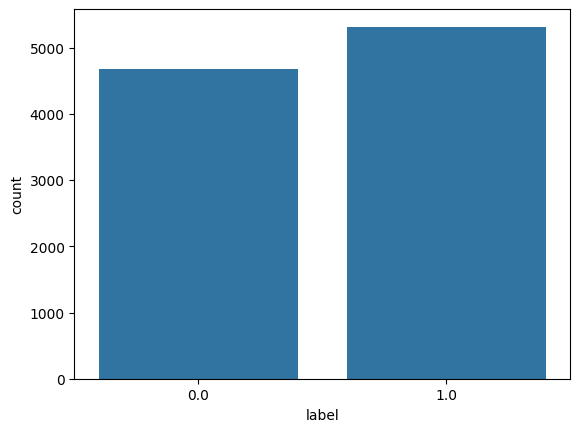

In [22]:
tahmin = model.predict(dataframe)
        
tahmin_df = pd.DataFrame({"label": tahmin})
            
# seaborn ile countplot'u çizdirin
sns.countplot(x="label", data=tahmin_df)
plt.show()